<h2>Features -> Log Transformation -> MinMaxScale -> Polynomial degree = 5 -> LR model -> Target

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('boston.csv', header=0,delimiter=',', encoding ='utf-8')
df = df[['AGE','LSTAT','MEDV']]
df=df.loc[150:351]
x=df[['AGE','LSTAT']].values # input
y=df[['MEDV']].values # output
x=x.astype(float)
y=y.astype(float)

In [3]:
#chia tách ra training và testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=16)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures


In [5]:
steps = [('logTransform',FunctionTransformer(np.log)),
        ('minmaxnormalize', MinMaxScaler()),
        ('polynomial',PolynomialFeatures(include_bias=False,degree=5)),
        ('modelLR',LinearRegression())]



In [6]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('logTransform', FunctionTransformer(func=<ufunc 'log'>)),
                ('minmaxnormalize', MinMaxScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('modelLR', LinearRegression())])

In [7]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('logTransform', FunctionTransformer(func=<ufunc 'log'>)),
                ('minmaxnormalize', MinMaxScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('modelLR', LinearRegression())])

In [8]:
from sklearn import metrics
# test
y_test_pred = pipe.predict(x_test)

print('Score or R-Squared', pipe.score(x_test, y_test))

print('Mean absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Mean absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))


Score or R-Squared 0.6797356215300895
Mean absolute Error: 3.67768359426376
Mean Squared Error: 24.17496132564359
Root Mean Squared Error: 4.916803974701818
Mean absolute Percentage Error: 0.15124479892468276


In [17]:
y_test_pred

array([[22.47473867],
       [19.34565637],
       [29.80295469],
       [48.51665994],
       [22.81562614],
       [23.052334  ],
       [21.77461376],
       [40.76040555],
       [35.18763506],
       [40.11532156],
       [38.00636295],
       [22.16450417],
       [27.29334894],
       [22.24256654],
       [24.81581222],
       [27.07590098],
       [30.96043263],
       [28.6434105 ],
       [23.98238259],
       [35.20388604],
       [37.64830282],
       [25.51121614],
       [25.02547502],
       [25.04694573],
       [22.05877907],
       [43.49334996],
       [34.37482432],
       [29.61171872],
       [21.42523814],
       [22.06454093],
       [25.75150355],
       [23.05291854],
       [25.5338383 ],
       [22.23177897],
       [21.63476839],
       [31.79380107],
       [32.15409211],
       [41.97818546],
       [32.95125576],
       [28.92732762],
       [41.34084927]])

In [9]:
# TRAIN
y_train_pred = pipe.predict(x_train)

print('Score or R-Squared: ', pipe.score(x_train, y_train))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_train, y_train_pred))

Score or R-Squared:  0.6126674491193969
Mean Absolute Error:  4.259286382170039
Mean Squared Error:  31.694335250352214
Root Mean Squared Error:  5.629772220112659
Mean Absolute Percentage Error:  0.15266418484438993


In [18]:
y_train_pred

array([[38.1706592 ],
       [24.16524405],
       [24.94429658],
       [29.79061797],
       [30.56910778],
       [27.38778473],
       [32.48790746],
       [19.55716557],
       [29.4783604 ],
       [21.70695028],
       [43.01050361],
       [34.75979649],
       [36.62101909],
       [41.75904875],
       [23.21826956],
       [25.71331345],
       [23.93876317],
       [49.51312002],
       [36.50715991],
       [22.29239451],
       [42.37190512],
       [19.68514066],
       [20.27593959],
       [25.43011409],
       [29.93270313],
       [25.45243526],
       [24.31584134],
       [21.57531828],
       [39.47965236],
       [21.28138434],
       [38.86488403],
       [29.05591683],
       [21.74730843],
       [40.95117826],
       [37.27809708],
       [21.71332159],
       [23.66486601],
       [45.59503074],
       [21.2905178 ],
       [20.89002109],
       [42.82924488],
       [40.48375435],
       [26.3793633 ],
       [23.80396773],
       [23.04527288],
       [32

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

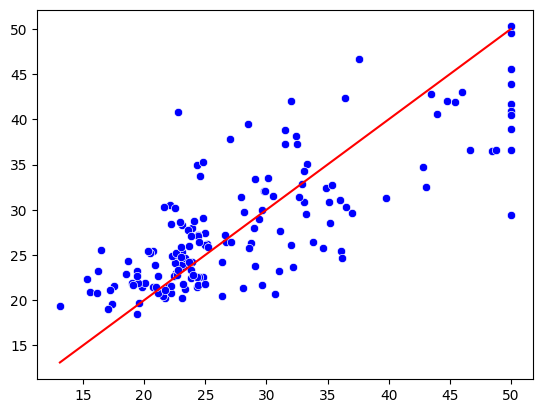

In [10]:
#Train
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten(),
                markers='0', color='b')
sns.lineplot(x=y_train.flatten(), y=y_train.flatten(),
            markers='o', color='r')
plt.show()

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

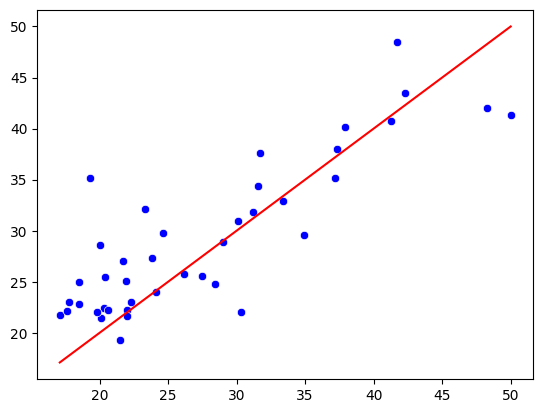

In [11]:
# biểu dồ Test
sns.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(),
                markers='o', color='b')
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(),
            markers='o', color='r')
plt.show()


In [12]:
y_test_pred = pipe.predict(x_test)
dfTestValidation = pd.DataFrame(list(zip(x_test[:,0], x_test[:,1],
                                         y_test.flatten(),
                                         y_test_pred.flatten())),
                                         columns=['LSTAT_test', 'AGE_test', 'y_test',
                                                  'y_test_predicted'])
dfTestValidation['Residual'] = dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']

dfTestValidation

,LSTAT_test,AGE_test,y_test,y_test_predicted,Residual
0,58.0,15.84,20.3,22.474739,-2.174739
1,97.3,14.10,21.5,19.345656,2.154344
2,14.7,5.08,24.6,29.802955,-5.202955
3,73.3,2.47,41.7,48.516660,-6.816660
4,74.3,11.74,18.5,22.815626,-4.315626
5,83.2,18.33,17.8,23.052334,-5.252334
6,28.4,12.43,17.1,21.774614,-4.674614
7,97.4,4.59,41.3,40.760406,0.539594
8,58.4,5.04,37.2,35.187635,2.012365
9,92.2,4.82,37.9,40.115322,-2.215322


In [13]:
y_train_pred = pipe.predict(x_train)
dftrainValidation = pd.DataFrame(list(zip(x_train[:,0], x_train[:,1],
                                         y_train.flatten(),
                                         y_train_pred.flatten())),
                                         columns=['LSTAT_train', 'AGE_train', 'y_train',
                                                  'y_train_predicted'])
dftrainValidation['Residual'] = dftrainValidation['y_train'] - dftrainValidation['y_train_predicted']

dftrainValidation

,LSTAT_train,AGE_train,y_train,y_train_predicted,Residual
0,32.9,3.53,32.4,38.170659,-5.770659
1,18.4,8.58,23.9,24.165244,-0.265244
2,17.2,7.34,22.6,24.944297,-2.344297
3,70.3,7.53,28.2,29.790618,-1.590618
4,52.8,5.98,22.1,30.569108,-8.469108
...,...,...,...,...,...
156,51.8,6.58,35.2,28.563707,6.636293
157,42.4,9.47,25.0,21.752756,3.247244
158,92.4,10.50,23.0,24.719204,-1.719204
159,16.3,6.59,25.2,25.887835,-0.687835


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

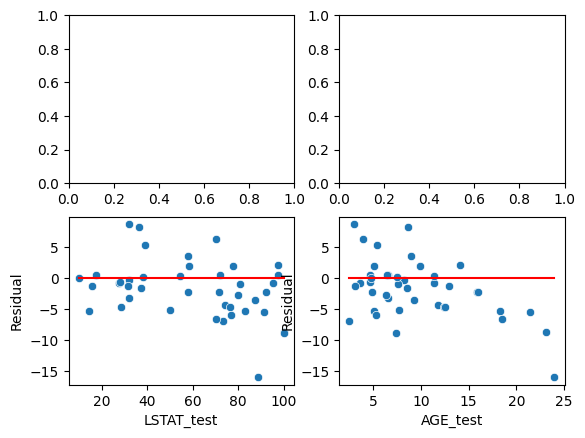

In [14]:

fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='LSTAT_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='LSTAT_test',y=[0]*len(dfTestValidation),
             color='r',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_test',y=[0]*len(dfTestValidation),
             color='r',ax=axes[1,1])
sns.scatterplot(data=dfTestValidation,x='AGE_test',y='Residual',ax=axes[1,1])
plt.show()



c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

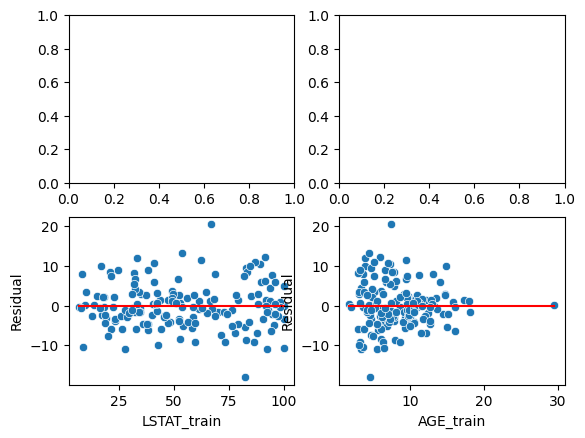

In [15]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dftrainValidation, x='LSTAT_train', y='Residual', ax=axes[1,0])
sns.lineplot(data=dftrainValidation, x='LSTAT_train', y=[0]*len(dftrainValidation),
             color = 'r', ax=axes[1,0])
sns.scatterplot(data=dftrainValidation, x='AGE_train', y='Residual', ax=axes[1,1])
sns.lineplot(data=dftrainValidation, x='AGE_train', y=[0]*len(dftrainValidation),
             color = 'r', ax=axes[1,1])
plt.show()



c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

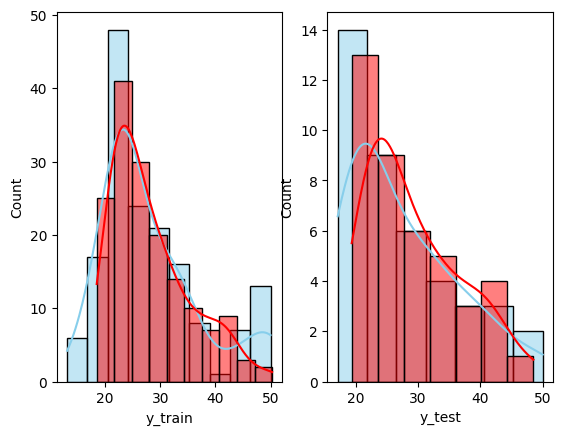

In [16]:
fig, axes = plt.subplots(1,2)

sns.histplot(data=dftrainValidation, x='y_train', color='skyblue',
              label='Actual', kde=True, ax=axes[0])
sns.histplot(data=dftrainValidation, x='y_train_predicted', color='red',
             label='Forecast', kde=True, ax=axes[0])
sns.histplot(data=dfTestValidation, x='y_test', color='skyblue',
              label='Actual', kde=True, ax=axes[1])
sns.histplot(data=dfTestValidation, x='y_test_predicted', color='red',
             label='Forecast', kde=True, ax=axes[1])
plt.show()